# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import SentimentIntensityanalyzer class from vaderSentiment.vadersentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# function to print sentiments of the sentence.



In [2]:
# Creating a pandas dataframe
data = pd.read_csv("dataset.csv")
data.head()

,Unnamed: 0,Data,Date,Time,tweetcaption
0,0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...
1,1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...
2,2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...
3,3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...


# Data visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35266 entries, 0 to 35265
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    35266 non-null  int64 
 1   Data          35266 non-null  object
 2   Date          35266 non-null  object
 3   Time          35266 non-null  object
 4   tweetcaption  35266 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [4]:
data.describe()   # describing the data

,Unnamed: 0
count,35266.000000
mean,17632.500000
std,10180.561633
min,0.000000
25%,8816.250000
50%,17632.500000
75%,26448.750000
max,35265.000000


<AxesSubplot:>

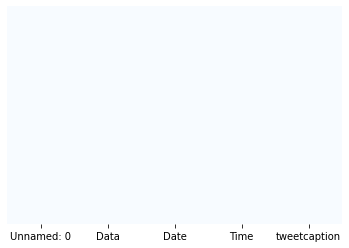

In [5]:
 sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")
# to check whether there is any missing data

In [6]:
data['neg'] = ''
data['neu'] = ''
data['pos'] = ''
data['compound'] = ''
data['sentiment'] = ''
 
# Create a SentimentIntensityAnalyzer object.
sid_obj = SentimentIntensityAnalyzer()

# polarity_scores method of SentimentIntensityAnalyzer
# object gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.

for i in range(len(data)):
    sentiment_dict = sid_obj.polarity_scores(data["tweetcaption"][i])
    data.loc[i,'neg'] = sentiment_dict['neg']
    data.loc[i,'neu'] = sentiment_dict['neu']
    data.loc[i,'pos'] = sentiment_dict['pos']
    data.loc[i,'compound'] = sentiment_dict['compound']
    
    if sentiment_dict['compound'] >= 0.05 :
        data.loc[i,'sentiment'] = "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
        data.loc[i,'sentiment'] = "Negative"
 
    else :
        data.loc[i,'sentiment'] = "Neutral"
 
    

In [7]:
data.head(10)

,Unnamed: 0,Data,Date,Time,tweetcaption,neg,neu,pos,compound,sentiment
0,0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,0.039,0.811,0.15,0.9757,Positive
1,1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,0.026,0.889,0.085,0.8438,Positive
2,2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,0.077,0.809,0.115,0.9197,Positive
3,3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,0.107,0.729,0.163,0.9324,Positive
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,0.144,0.724,0.131,-0.0772,Negative
5,5,ArrestBishopFranco,7/14/2020,7:00:21,ArrestBishopFranco He should be arrested and t...,0.124,0.775,0.101,-0.7269,Negative
6,6,CWC19Final,7/14/2020,7:00:21,My heart skipped a beat when I watched the hig...,0.018,0.805,0.177,0.9934,Positive
7,7,armyisoverparty,7/14/2020,7:00:21,nchild Chill Antis try to make armyisoverparty...,0.104,0.682,0.214,0.9564,Positive
8,8,WorldCup2019,7/14/2020,7:00:21,Brilliant memories WorldCup2019 WorldCupFinal ...,0.031,0.773,0.196,0.9868,Positive
9,9,BieberWhatsPoppin,7/14/2020,7:00:21,So justin casually makes a remix just playing ...,0.0,0.852,0.148,0.8831,Positive


D:\Anakonda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


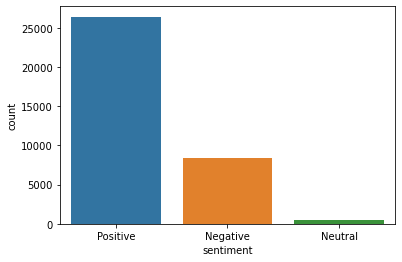

In [8]:
# visulalizing the number of positive negative and nuetral sentiments in the data

x = data['sentiment']
sns.countplot(x)
plt.show()

### Analizing the tweets

In [9]:

data['length'] = data["tweetcaption"].apply(len)

In [10]:
data

,Unnamed: 0,Data,Date,Time,tweetcaption,neg,neu,pos,compound,sentiment,length
0,0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,0.039,0.811,0.15,0.9757,Positive,1468
1,1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,0.026,0.889,0.085,0.8438,Positive,1221
2,2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,0.077,0.809,0.115,0.9197,Positive,1192
3,3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,0.107,0.729,0.163,0.9324,Positive,1623
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,0.144,0.724,0.131,-0.0772,Negative,1340
...,...,...,...,...,...,...,...,...,...,...,...
35261,35261,SwaraBhasker,9/14/2020,13:00:01,I ve never seen SwaraBhasker supporting for th...,0.123,0.741,0.135,0.4492,Positive,1276
35262,35262,TukdeTukdeGang,9/14/2020,13:00:01,hindu DelhiRiots2020 Best thing has happened a...,0.102,0.719,0.179,0.9763,Positive,1707
35263,35263,IndooKiJawani,9/14/2020,13:00:01,The team of IndooKiJawani have a surprise for ...,0.042,0.837,0.121,0.9644,Positive,1456
35264,35264,DelhiRiots2020,9/14/2020,13:00:01,The people of India should protest and demand ...,0.064,0.872,0.064,0.4695,Positive,1724


<AxesSubplot:ylabel='Frequency'>

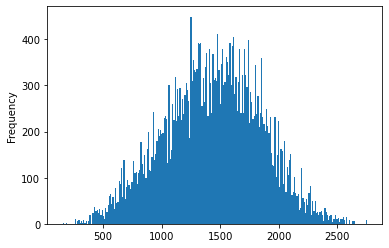

In [11]:
# Analysing the frequency of tweets
data['length'].plot(bins=250, kind='hist') 

In [12]:
#Checking the length of tweets (mean ,std ,min )
data.describe()

,Unnamed: 0,length
count,35266.000000,35266.000000
mean,17632.500000,1438.131118
std,10180.561633,410.104109
min,0.000000,153.000000
25%,8816.250000,1156.000000
50%,17632.500000,1450.000000
75%,26448.750000,1731.000000
max,35265.000000,2753.000000


In [13]:
positive = data[data['sentiment']=="Positive"]
positive

,Unnamed: 0,Data,Date,Time,tweetcaption,neg,neu,pos,compound,sentiment,length
0,0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,0.039,0.811,0.15,0.9757,Positive,1468
1,1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,0.026,0.889,0.085,0.8438,Positive,1221
2,2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,0.077,0.809,0.115,0.9197,Positive,1192
3,3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,0.107,0.729,0.163,0.9324,Positive,1623
6,6,CWC19Final,7/14/2020,7:00:21,My heart skipped a beat when I watched the hig...,0.018,0.805,0.177,0.9934,Positive,1417
...,...,...,...,...,...,...,...,...,...,...,...
35261,35261,SwaraBhasker,9/14/2020,13:00:01,I ve never seen SwaraBhasker supporting for th...,0.123,0.741,0.135,0.4492,Positive,1276
35262,35262,TukdeTukdeGang,9/14/2020,13:00:01,hindu DelhiRiots2020 Best thing has happened a...,0.102,0.719,0.179,0.9763,Positive,1707
35263,35263,IndooKiJawani,9/14/2020,13:00:01,The team of IndooKiJawani have a surprise for ...,0.042,0.837,0.121,0.9644,Positive,1456
35264,35264,DelhiRiots2020,9/14/2020,13:00:01,The people of India should protest and demand ...,0.064,0.872,0.064,0.4695,Positive,1724


In [14]:
negative = data[data['sentiment']=="Negative"]
negative

,Unnamed: 0,Data,Date,Time,tweetcaption,neg,neu,pos,compound,sentiment,length
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,0.144,0.724,0.131,-0.0772,Negative,1340
5,5,ArrestBishopFranco,7/14/2020,7:00:21,ArrestBishopFranco He should be arrested and t...,0.124,0.775,0.101,-0.7269,Negative,1092
19,19,VizagBlast,7/14/2020,7:00:21,With smoke that was visible from 15km away a m...,0.152,0.801,0.047,-0.977,Negative,1847
20,20,FreeDrKafeel,7/14/2020,7:00:21,What kind of government is this preventing a d...,0.164,0.718,0.117,-0.6896,Negative,849
30,30,ArrestBishopFranco,7/14/2020,7:59:14,ArrestBishopFranco He should be arrested and t...,0.124,0.775,0.101,-0.7269,Negative,1092
...,...,...,...,...,...,...,...,...,...,...,...
35243,35243,Justice4SSRIsGlobalDemand,9/14/2020,13:00:01,Lets all write and mention this to Do they eve...,0.184,0.637,0.18,-0.4948,Negative,1608
35244,35244,StandWithUmarKhalid,9/14/2020,13:00:01,Power moves are not always driven by rationale...,0.147,0.734,0.119,-0.7358,Negative,1938
35245,35245,HindiDiwas,9/14/2020,13:00:01,Imposing Hindi forcibly I won t serve the purp...,0.15,0.711,0.139,-0.8442,Negative,1915
35251,35251,NOENTRY,9/14/2020,13:00:01,fukk off uuuU a member of younger siblinggg ga...,0.15,0.816,0.033,-0.9756,Negative,1229


In [15]:
neutral = data[data['sentiment']=="Neutral"]
neutral

,Unnamed: 0,Data,Date,Time,tweetcaption,neg,neu,pos,compound,sentiment,length
902,902,OsmaniaGeneralHospital,7/15/2020,12:59:18,This is not the Telangana we fought for Osmani...,0.075,0.841,0.084,0.0163,Neutral,1643
1194,1194,SkyForNamjoon,7/16/2020,0:59:18,A whole day late but I saw this was trending y...,0.072,0.855,0.072,-0.0,Neutral,735
1225,1225,SkyForNamjoon,7/16/2020,1:59:19,A whole day late but I saw this was trending y...,0.072,0.855,0.072,-0.0,Neutral,735
1258,1258,SkyForNamjoon,7/16/2020,2:59:19,A whole day late but I saw this was trending y...,0.072,0.855,0.072,-0.0,Neutral,735
1790,1790,Campeones,7/16/2020,23:59:21,"campeones HalaMadrid,Campeones ebay es itm 353...",0.0,1.0,0.0,0.0,Neutral,435
...,...,...,...,...,...,...,...,...,...,...,...
35159,35159,TikTok,9/14/2020,8:00:02,had 2 delete tiktok cos i have generalised anx...,0.07,0.873,0.057,0.0308,Neutral,1091
35175,35175,TikTok,9/14/2020,9:00:02,had 2 delete tiktok cos i have generalised anx...,0.07,0.873,0.057,0.0308,Neutral,1091
35194,35194,TikTok,9/14/2020,10:00:06,had 2 delete tiktok cos i have generalised anx...,0.07,0.873,0.057,0.0308,Neutral,1091
35214,35214,TikTok,9/14/2020,11:00:02,had 2 delete tiktok cos i have generalised anx...,0.07,0.873,0.057,0.0308,Neutral,1091


## Story Generation and Visualization from Tweets from wordcloud
#A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

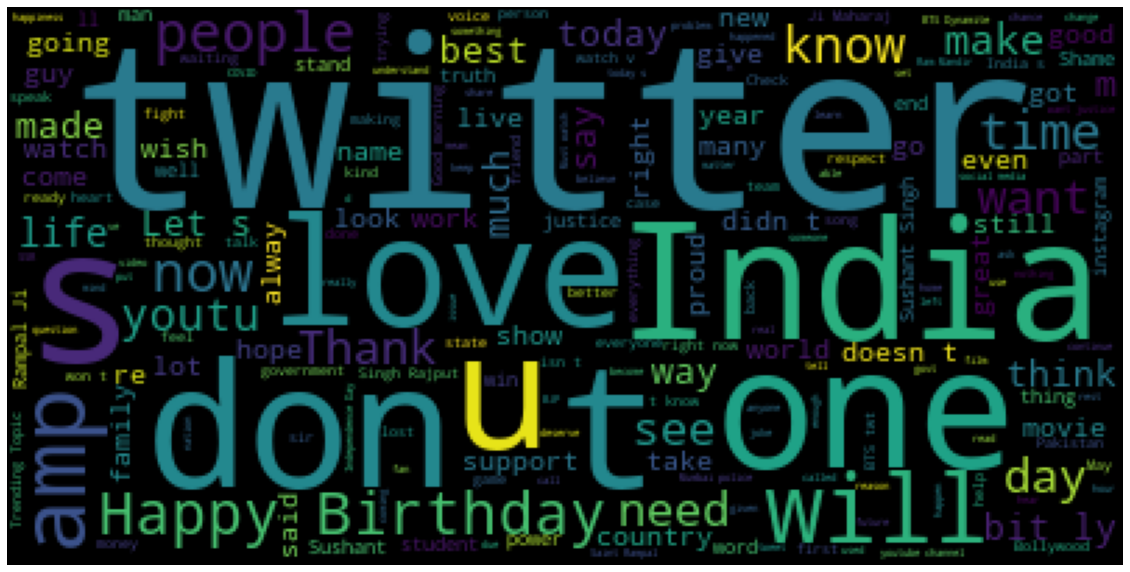

In [16]:


sentences = data['tweetcaption'].tolist()
sentences_as_one_string = " ".join(sentences)

from wordcloud import WordCloud
wordcloud = WordCloud().generate(sentences_as_one_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Building Functions

In [17]:
# punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
# stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:

from sklearn.feature_extraction.text import CountVectorizer


In [20]:
#  defining a function to clean up all the messages 
# The function performs the following: 
#(1) remove punctuation
#(2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]  #removing punctuation
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [21]:
# applying the newly added function to the data
tweets_df_clean = data['tweetcaption'].apply(message_cleaning)

In [22]:
print(tweets_df_clean[0]) # showing the cleaned up version

['Love', 'vacation', 'vibes', 'amazing', 'beautiful', 'cabo', 'mexico', 'livelife', 'noregrets', 'amazing', 'marriott', 'jwmarriott', 'peaceful', 'LoveIsEssential', 'blessed', 'appreciate', 'beachlife', 'becoming', 'energy', 'tuesdayvibesThat', 'looks', 'good', 'tuesdayvibes', 'tacotuesdayLIVE', 'TUESDAY', 'NIGHT', 'KPOP', 'W', 'Unreal', 'OHIO', 'tuesdayvibes', 'talktimewithbolu', 'happytimesMy', 'damn', 'followers', 'moved', 'weeks', 'getting', '50', '60', 'day', 'least', 'number', 'gone', 'ANYONE', 'ELSE', 'censorship', 'WWG1GWA', 'tuesdayvibes', 'QAnon2020', 'QAnons', 'q', 'QDrops', 'Conservative', 'followback', 'always', 'follow', 'backCommon', 'sense', 'common', 'count', 'Unfortunately', 'present', '1600', 'Pennsylvania', 'Avenue', 'YourEyesTellNow', 'PressConference', 'tuesdayvibes', 'BLACKPINK', 'BLM', 'BlackTwitter', 'BlackTwitterMovement', 'Biden', 'Biden2020Landslide', 'TrumpIsANationalDisgrace', 'wordsJust', 'landing', 'naturephotography', 'nature', 'Travel', 'travelphotogra

In [23]:
print(data['tweetcaption'][0]) # showing the original version

Love it here vacation vibes amazing beautiful cabo mexico livelife noregrets amazing marriott jwmarriott peaceful LoveIsEssential blessed appreciate beachlife becoming energy tuesdayvibes,That looks so good tuesdayvibes tacotuesday,LIVE NOW TUESDAY NIGHT KPOP W Unreal NOW OHIO tuesdayvibes talktimewithbolu happytimes,My damn followers haven t moved in weeks I m getting 50 60 a day at least and my number hasn t gone up ANYONE ELSE censorship WWG1GWA tuesdayvibes QAnon2020 QAnons q QDrops Conservative followback I always follow back,Common sense is not that common You can t count on it Unfortunately it s not present at 1600 Pennsylvania Avenue YourEyesTellNow PressConference tuesdayvibes BLACKPINK BLM BlackTwitter BlackTwitterMovement Biden Biden2020Landslide TrumpIsANationalDisgrace words,Just landing naturephotography nature Travel travelphotography tourism photo photos photography photooftheday picoftheday tuesdayvibes canon palatka,LIVE NOW TUESDAY NIGHT KPOP W Unreal NOW SUMMER BREE

In [24]:
#TOKENIZATION
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)

In [25]:
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(data["tweetcaption"])
tweets_countvectorizer.shape

(35266, 185561)

In [26]:
tweets_countvectorizer.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
X = tweets_countvectorizer
Y = data["sentiment"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Using Naive Bayes model

In [29]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, Y_train)

MultinomialNB()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix


In [31]:
# Predicting the Test set results
prediction_NB = NB_classifier.predict(X_test)
cm_NB = confusion_matrix(Y_test, prediction_NB)
cm_NB

array([[1703,    0,   36],
       [  17,   70,    6],
       [ 421,   17, 4784]], dtype=int64)

In [32]:
#classification_report
print(classification_report(Y_test, prediction_NB))

              precision    recall  f1-score   support

    Negative       0.80      0.98      0.88      1739
     Neutral       0.80      0.75      0.78        93
    Positive       0.99      0.92      0.95      5222

    accuracy                           0.93      7054
   macro avg       0.86      0.88      0.87      7054
weighted avg       0.94      0.93      0.93      7054



## Using SVC model

In [43]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score

In [36]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, Y_train)

prediction_svc = svc.predict(X_test)

In [37]:
cm_svc = confusion_matrix(Y_test, prediction_svc)
cm_svc

array([[1692,    0,   47],
       [   1,   83,    9],
       [  31,    0, 5191]], dtype=int64)

In [38]:
#classification_report
print(classification_report(Y_test, prediction_svc))

              precision    recall  f1-score   support

    Negative       0.98      0.97      0.98      1739
     Neutral       1.00      0.89      0.94        93
    Positive       0.99      0.99      0.99      5222

    accuracy                           0.99      7054
   macro avg       0.99      0.95      0.97      7054
weighted avg       0.99      0.99      0.99      7054



## Using random forest model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(X_train, Y_train)

prediction_rf = rf.predict(X_test)

In [49]:
cm_rf = confusion_matrix(Y_test, prediction_rf)
cm_rf

array([[1636,    0,  103],
       [   0,   82,   11],
       [   6,    0, 5216]], dtype=int64)

In [50]:
#classification_report
print(classification_report(Y_test, prediction_rf))

              precision    recall  f1-score   support

    Negative       1.00      0.94      0.97      1739
     Neutral       1.00      0.88      0.94        93
    Positive       0.98      1.00      0.99      5222

    accuracy                           0.98      7054
   macro avg       0.99      0.94      0.96      7054
weighted avg       0.98      0.98      0.98      7054

